In [62]:
import pandas as pd

# Read the dataset
df = pd.read_csv('dataset/kidney_disease.csv')

# Display the first 5 rows to verify
print(df.head())


   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [87]:
#rename the colums
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'target'  # Optional: Rename target for clarity
}, inplace=True)


print(df.columns)


Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'target'],
      dtype='object')


In [139]:
#handling missing values

print(df.isnull().sum())



id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     1
pedal_edema                  1
anemia                       1
target                       0
dtype: int64


In [140]:
df.drop('id', axis=1, inplace=True)    # drop id


In [141]:
#handle categorical values
cat_cols = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
            'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [142]:
num_cols = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
            'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
            'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
            'red_blood_cell_count']

for col in num_cols:
    # Convert to numeric, force errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill NaN with mean
    df[col] = df[col].fillna(df[col].mean())




In [143]:
print(df.isnull().sum())  # Should show all 0s


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
target                     0
dtype: int64


In [144]:
cols_left = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for col in cols_left:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numbers, set invalid ones as NaN
    df[col].fillna(df[col].mean(), inplace=True)       # Fill remaining NaNs with mean


C:\Users\Disha Satpute\AppData\Local\Temp\ipykernel_12200\2281560514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)       # Fill remaining NaNs with mean


In [145]:
print(df.isnull().sum())  # Should be all zeros!


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
target                     0
dtype: int64


In [146]:
# label encoder
cat_cols = [
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'pedal_edema',
    'anemia'
]


In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [148]:
print(df.dtypes)


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
appetite                     int64
pedal_edema                  int64
anemia                       int64
target                      object
dtype: object


In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])


In [150]:
print(df.select_dtypes(include='object').columns)


Index([], dtype='object')


In [151]:
print(df['target'].unique())  # Should print [0 1]
print(df.dtypes['target'])    # Should print int64


[0 1 2]
int64


In [152]:

for col in cat_cols:
    print(f"{col} -> {df[col].unique()}")


red_blood_cells -> [1 0]
pus_cell -> [1 0]
pus_cell_clumps -> [0 1]
bacteria -> [0 1]
hypertension -> [1 0]
diabetes_mellitus -> [1 0]
coronary_artery_disease -> [0 1]
appetite -> [0 1]
pedal_edema -> [0 1]
anemia -> [0 1]


In [153]:
#there is problem in 2 columns

# View original string values before encoding (re-load data if needed)

print(df['diabetes_mellitus'].value_counts())
print(df['coronary_artery_disease'].value_counts())
#

diabetes_mellitus
0    263
1    137
Name: count, dtype: int64
coronary_artery_disease
0    366
1     34
Name: count, dtype: int64


In [135]:
import pandas as pd

df = pd.read_csv('dataset/kidney_disease.csv')


In [136]:
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'target'
}, inplace=True)


In [137]:
# Step 1: Convert to lowercase strings and strip extra characters
df['diabetes_mellitus'] = df['diabetes_mellitus'].astype(str).str.lower().str.strip().str.replace(r'[.\s]', '', regex=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].astype(str).str.lower().str.strip().str.replace(r'[.\s]', '', regex=True)

# Step 2: Map yes/no to 1/0
dm_map = {'yes': 1, 'no': 0}
cad_map = {'yes': 1, 'no': 0}

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(dm_map)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(cad_map)

# Step 3: Convert to numeric and fill missing values with 0
df['diabetes_mellitus'] = pd.to_numeric(df['diabetes_mellitus'], errors='coerce').fillna(0).astype(int)
df['coronary_artery_disease'] = pd.to_numeric(df['coronary_artery_disease'], errors='coerce').fillna(0).astype(int)


In [138]:
print(df['diabetes_mellitus'].unique())         # Should be [0 1]
print(df['coronary_artery_disease'].unique())   # Should be [0 1]


[1 0]
[0 1]


In [154]:
non_numeric_cells = df.apply(lambda col: col.map(lambda x: isinstance(x, str)))

if non_numeric_cells.any().any():
    print("⚠️ Warning: Some string values still exist!")
else:
    print("✅ All values are numeric and cleaned.")


✅ All values are numeric and cleaned.


In [155]:
print(df.columns)


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'target'],
      dtype='object')


In [156]:
print("Unique values:", df['target'].unique())
print("\nClass distribution:")
print(df['target'].value_counts())


Unique values: [0 1 2]

Class distribution:
target
0    248
2    150
1      2
Name: count, dtype: int64


In [157]:
# Treat 2 as 1 (CKD), and drop label 1 (unclear/invalid)
df = df[df['target'] != 1]
df['target'] = df['target'].replace(2, 1)

# Recheck
print(df['target'].value_counts())
print(df['target'].unique())


target
0    248
1    150
Name: count, dtype: int64
[0 1]


In [162]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [163]:
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100


C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.3859 - loss: 458.7453 - val_accuracy: 0.3594 - val_loss: 286.8063
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3597 - loss: 238.7066 - val_accuracy: 0.3594 - val_loss: 39.1963
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4704 - loss: 35.4983 - val_accuracy: 0.6406 - val_loss: 71.2246
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6103 - loss: 88.2079 - val_accuracy: 0.6406 - val_loss: 100.7498
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6078 - loss: 114.7514 - val_accuracy: 0.6406 - val_loss: 93.3245
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5928 - loss: 105.6807 - val_accuracy: 0.6406 - val_loss: 61.1615
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6291 - loss: 56.9954 - val_accuracy: 0.6406 - val_loss: 13.6834
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5604 - loss: 14.7736 - val_accuracy: 0.3594 

In [164]:
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000252DB0DD1C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
✅ Accuracy: 0.65

📊 Confusion Matrix:
[[50  0]
 [28  2]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        50
           1       1.00      0.07      0.12        30

    accuracy                           0.65        80
   macro avg       0.82      0.53      0.45        80
weighted avg       0.78      0.65      0.54        80



In [165]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
sm = SMOTE(random_state=42)

# Apply only to training data (not test!)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print new class distribution
import numpy as np
unique, counts = np.unique(y_train_res, return_counts=True)
print("Balanced class distribution:", dict(zip(unique, counts)))


Balanced class distribution: {np.int64(0): np.int64(198), np.int64(1): np.int64(198)}


In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Rebuild the model
ann_model = Sequential()
ann_model.add(Dense(units=32, activation='relu', input_shape=(X_train_res.shape[1],)))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = ann_model.fit(
    X_train_res, y_train_res,
    batch_size=100,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.4096 - loss: 56.8344 - val_accuracy: 0.0250 - val_loss: 36.5299
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6278 - loss: 18.0550 - val_accuracy: 0.0250 - val_loss: 57.6275
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6261 - loss: 19.2545 - val_accuracy: 0.0250 - val_loss: 5.7165
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4608 - loss: 7.2418 - val_accuracy: 0.9750 - val_loss: 0.3737
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4492 - loss: 6.0893 - val_accuracy: 0.0250 - val_loss: 24.6873
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6184 - loss: 9.5743 - val_accuracy: 0.0250 - val_loss: 7.0783
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5475 - loss: 3.2575 - val_accuracy: 0.6375 - val_loss: 0.5733
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5157 - loss: 3.0502 - val_accuracy: 0.0250 - va

In [168]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
✅ Accuracy: 0.7625

📊 Confusion Matrix:
[[49  1]
 [18 12]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        50
           1       0.92      0.40      0.56        30

    accuracy                           0.76        80
   macro avg       0.83      0.69      0.70        80
weighted avg       0.80      0.76      0.73        80



In [169]:
ann_model.save("ckd_ann_model_after_smote.h5")
print("Model saved!")


Model saved!


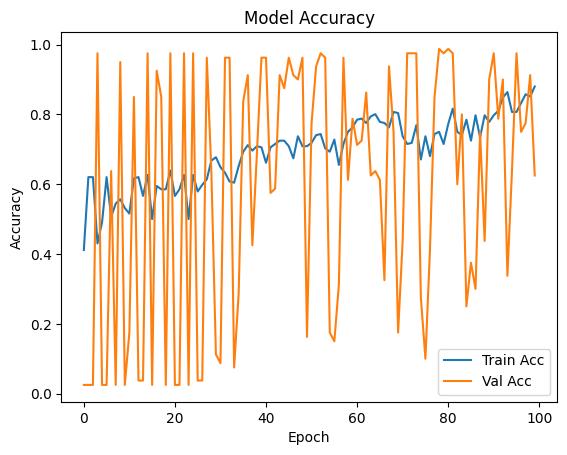

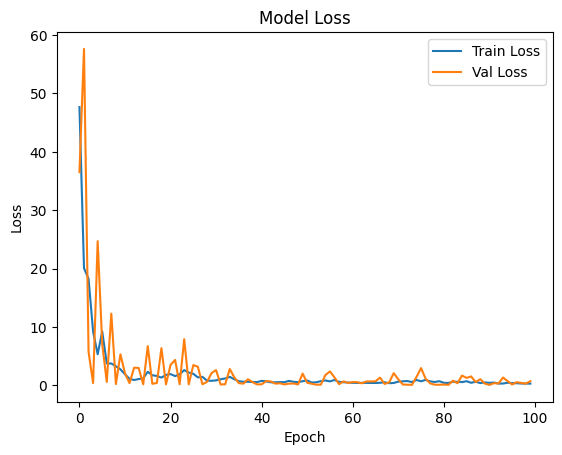

In [170]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [173]:
import numpy as np

# Make sure y_test is a Series or numpy array
y_test_values = y_test.values if hasattr(y_test, 'values') else y_test

# Get indexes of 5 CKD (1) and 5 Not CKD (0)
ckd_indices = np.where(y_test_values == 1)[0][:5]
not_ckd_indices = np.where(y_test_values == 0)[0][:5]

# Combine indices
sample_indices = np.concatenate([ckd_indices, not_ckd_indices])

print("🔍 Testing 10 samples (5 CKD, 5 Not CKD):\n")

for idx in sample_indices:
    sample = X_test.iloc[idx].values.reshape(1, -1)
    true_label = y_test_values[idx]
    
    pred_prob = ann_model.predict(sample)[0][0]
    pred_class = int(pred_prob > 0.5)

    print(f"🎯 Sample index: {idx}")
    print(f"   ➤ Prediction Probability: {pred_prob:.4f}")
    print(f"   ➤ Predicted Class: {'CKD' if pred_class == 1 else 'Not CKD'}")
    print(f"   ✅ Actual Class   : {'CKD' if true_label == 1 else 'Not CKD'}\n")


🔍 Testing 10 samples (5 CKD, 5 Not CKD):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
🎯 Sample index: 0
   ➤ Prediction Probability: 0.3253
   ➤ Predicted Class: Not CKD
   ✅ Actual Class   : CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
🎯 Sample index: 4
   ➤ Prediction Probability: 0.2150
   ➤ Predicted Class: Not CKD
   ✅ Actual Class   : CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
🎯 Sample index: 6
   ➤ Prediction Probability: 0.0270
   ➤ Predicted Class: Not CKD
   ✅ Actual Class   : CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
🎯 Sample index: 7
   ➤ Prediction Probability: 0.5781
   ➤ Predicted Class: CKD
   ✅ Actual Class   : CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
🎯 Sample index: 9
   ➤ Prediction Probability: 0.4891
   ➤ Predicted Class: Not CKD
   ✅ Actual Class   : CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
🎯 Sample index: 1
   ➤ Prediction Probability: 0.0000
   ➤ Predicted Class: Not CKD
   ✅ Actual Class   : Not CKD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
🎯 Sample index: 2
   ➤

In [174]:
print("🎯 Unique values in target:", df['target'].unique())
print("\n📊 Class distribution:")
print(df['target'].value_counts())


🎯 Unique values in target: [0 1]

📊 Class distribution:
target
0    248
1    150
Name: count, dtype: int64


C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6389 - loss: 885.8775 - val_accuracy: 0.0250 - val_loss: 1735.1176
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6390 - loss: 545.9531 - val_accuracy: 0.0250 - val_loss: 845.0587
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6405 - loss: 229.6211 - val_accuracy: 0.2500 - val_loss: 13.7328
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4243 - loss: 83.4794 - val_accuracy: 0.5625 - val_loss: 4.4892
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5389 - loss: 31.0402 - val_accuracy: 0.0250 - val_loss: 100.2038
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4790 - loss: 35.4934 - val_accuracy: 0.0375 - val_loss: 48.1141
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5099 - loss: 24.0416 - val_accuracy: 0.9750 - val_loss: 0.7333
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4423 - loss: 21.370

C:\Users\Disha Satpute\AppData\Local\Temp\ipykernel_12200\1324377296.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Disha Satpute\AppData\Local\Temp\ipykernel_12200\1324377296.py:59: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


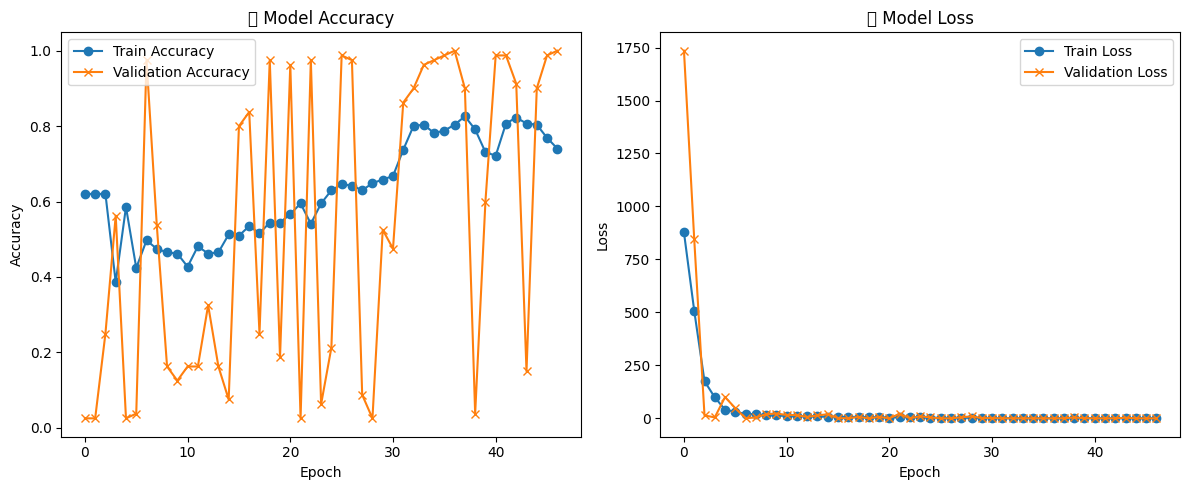

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1️⃣ Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=32, activation='relu', input_shape=(X_train_res.shape[1],)))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))  # Binary output (0 = Not CKD, 1 = CKD)

# 2️⃣ Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3️⃣ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4️⃣ Train the model
history = ann_model.fit(
    X_train_res, y_train_res,
    batch_size=32,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 5️⃣ Evaluate on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 6️⃣ Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [176]:
import numpy as np

# Reset index for matching
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Get 5 CKD and 5 Not CKD samples
ckd_samples = X_test[y_test == 1].sample(5, random_state=42)
non_ckd_samples = X_test[y_test == 0].sample(5, random_state=42)

# Combine them
sample_cases = pd.concat([ckd_samples, non_ckd_samples])
sample_labels = y_test.loc[sample_cases.index]

# Run predictions
for i, (index, row) in enumerate(sample_cases.iterrows()):
    sample_input = np.array(row).reshape(1, -1)
    sample_pred_prob = ann_model.predict(sample_input, verbose=0)
    sample_pred = int(sample_pred_prob[0][0] > 0.5)

    print(f"\n🎯 Sample index: {index}")
    print(f"   ➤ Prediction Probability: {sample_pred_prob[0][0]:.4f}")
    print(f"   ➤ Predicted Class       : {'CKD' if sample_pred else 'Not CKD'}")
    print(f"   ✅ Actual Class          : {'CKD' if sample_labels.loc[index]==1 else 'Not CKD'}")



🎯 Sample index: 72
   ➤ Prediction Probability: 0.9423
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : CKD

🎯 Sample index: 35
   ➤ Prediction Probability: 0.9863
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : CKD

🎯 Sample index: 61
   ➤ Prediction Probability: 0.9896
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : CKD

🎯 Sample index: 44
   ➤ Prediction Probability: 0.9925
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : CKD

🎯 Sample index: 21
   ➤ Prediction Probability: 0.9999
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : CKD

🎯 Sample index: 25
   ➤ Prediction Probability: 0.0009
   ➤ Predicted Class       : Not CKD
   ✅ Actual Class          : Not CKD

🎯 Sample index: 63
   ➤ Prediction Probability: 0.9987
   ➤ Predicted Class       : CKD
   ✅ Actual Class          : Not CKD

🎯 Sample index: 49
   ➤ Prediction Probability: 0.0031
   ➤ Predicted Class       : Not CKD
   ✅ Actual Class          : Not CKD

🎯 S